# To Explore Decision Tree Algorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the data
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.drop(['Id'],axis=1,inplace=True)

In [7]:
iris.shape

(150, 5)

In [8]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Data visualisation

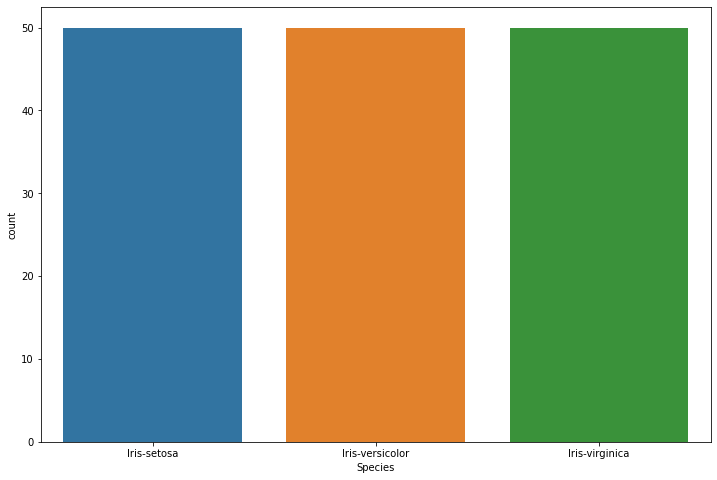

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='Species',data=iris)

SepalLengthCm       AxesSubplot(0.125,0.657941;0.352273x0.222059)
SepalWidthCm     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
PetalLengthCm       AxesSubplot(0.125,0.391471;0.352273x0.222059)
PetalWidthCm     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

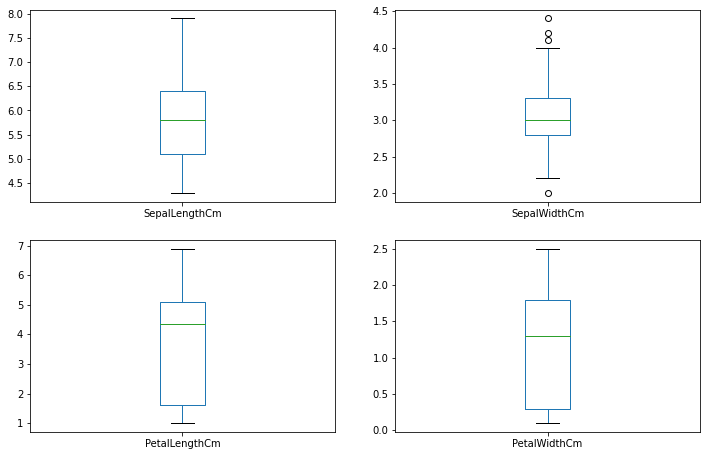

In [11]:
#plotting boxplot to check outliers
iris.plot(kind='box',subplots=True,layout=(3,2),figsize=(12,12),grid=False)

In [12]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


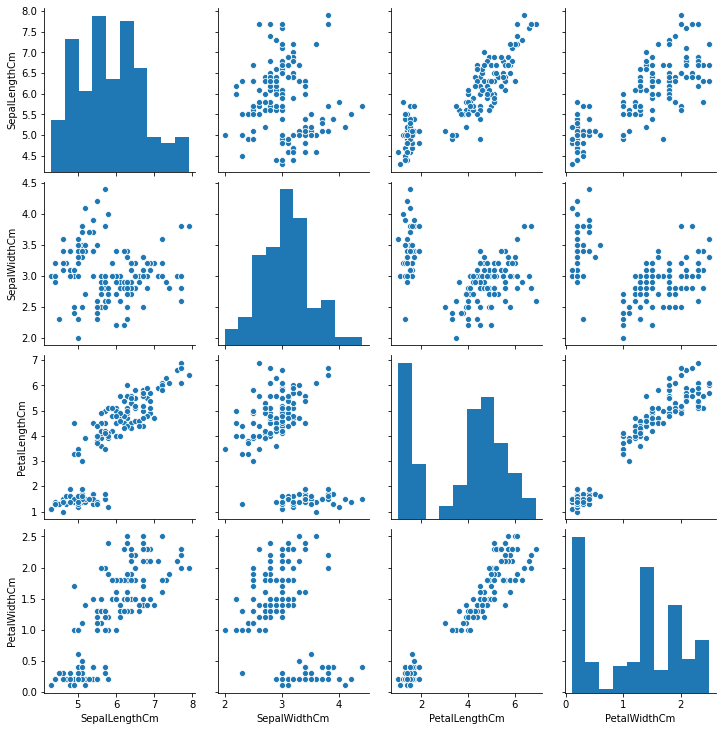

In [13]:
sns.pairplot(data=iris)

# Train test split
now we have the necessary data we can split data into testing and training data using sklearn train_test_split method

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = iris.drop(['Species'],axis=1)
y = iris['Species']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
#fitting the data 
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
#predicting the data 
pred = dtree.predict(X_test)
pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [20]:
#compare original and predicted data
df = pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
47,Iris-setosa,Iris-setosa
149,Iris-virginica,Iris-virginica
71,Iris-versicolor,Iris-versicolor
121,Iris-virginica,Iris-virginica
25,Iris-setosa,Iris-setosa


# Metric evaluation

In [21]:
from sklearn.metrics import classification_report , confusion_matrix

In [22]:
pd.Series(pred).value_counts()

Iris-versicolor    20
Iris-setosa        14
Iris-virginica     11
dtype: int64

In [23]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      1.00      0.95        18
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.96        45
      macro avg       0.97      0.95      0.95        45
   weighted avg       0.96      0.96      0.95        45



[[14  0  0]
 [ 0 18  0]
 [ 0  2 11]]


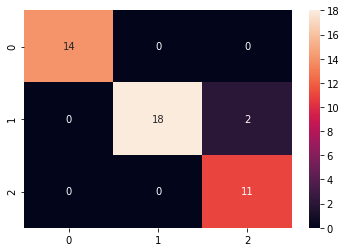

In [24]:
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(pred,y_test),annot = True)

In [25]:
np.mean(pred==y_test)

0.9555555555555556

# Visualizing the Decision tree to understand it better

In [26]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


[Text(1953.0, 2201.58, 'Petal_Length <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]\nclass = Iris-virginica'),
 Text(1652.5384615384614, 1712.34, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(2253.4615384615386, 1712.34, 'Petal_Width <= 1.75\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]\nclass = Iris-virginica'),
 Text(1201.8461538461538, 1223.1, 'Petal_Length <= 4.95\ngini = 0.202\nsamples = 35\nvalue = [0, 31, 4]\nclass = Iris-versicolor'),
 Text(600.9230769230769, 733.8599999999999, 'Petal_Width <= 1.65\ngini = 0.064\nsamples = 30\nvalue = [0, 29, 1]\nclass = Iris-versicolor'),
 Text(300.46153846153845, 244.6199999999999, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Iris-versicolor'),
 Text(901.3846153846154, 244.6199999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(1802.7692307692307, 733.8599999999999, 'Petal_Width <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-virginica

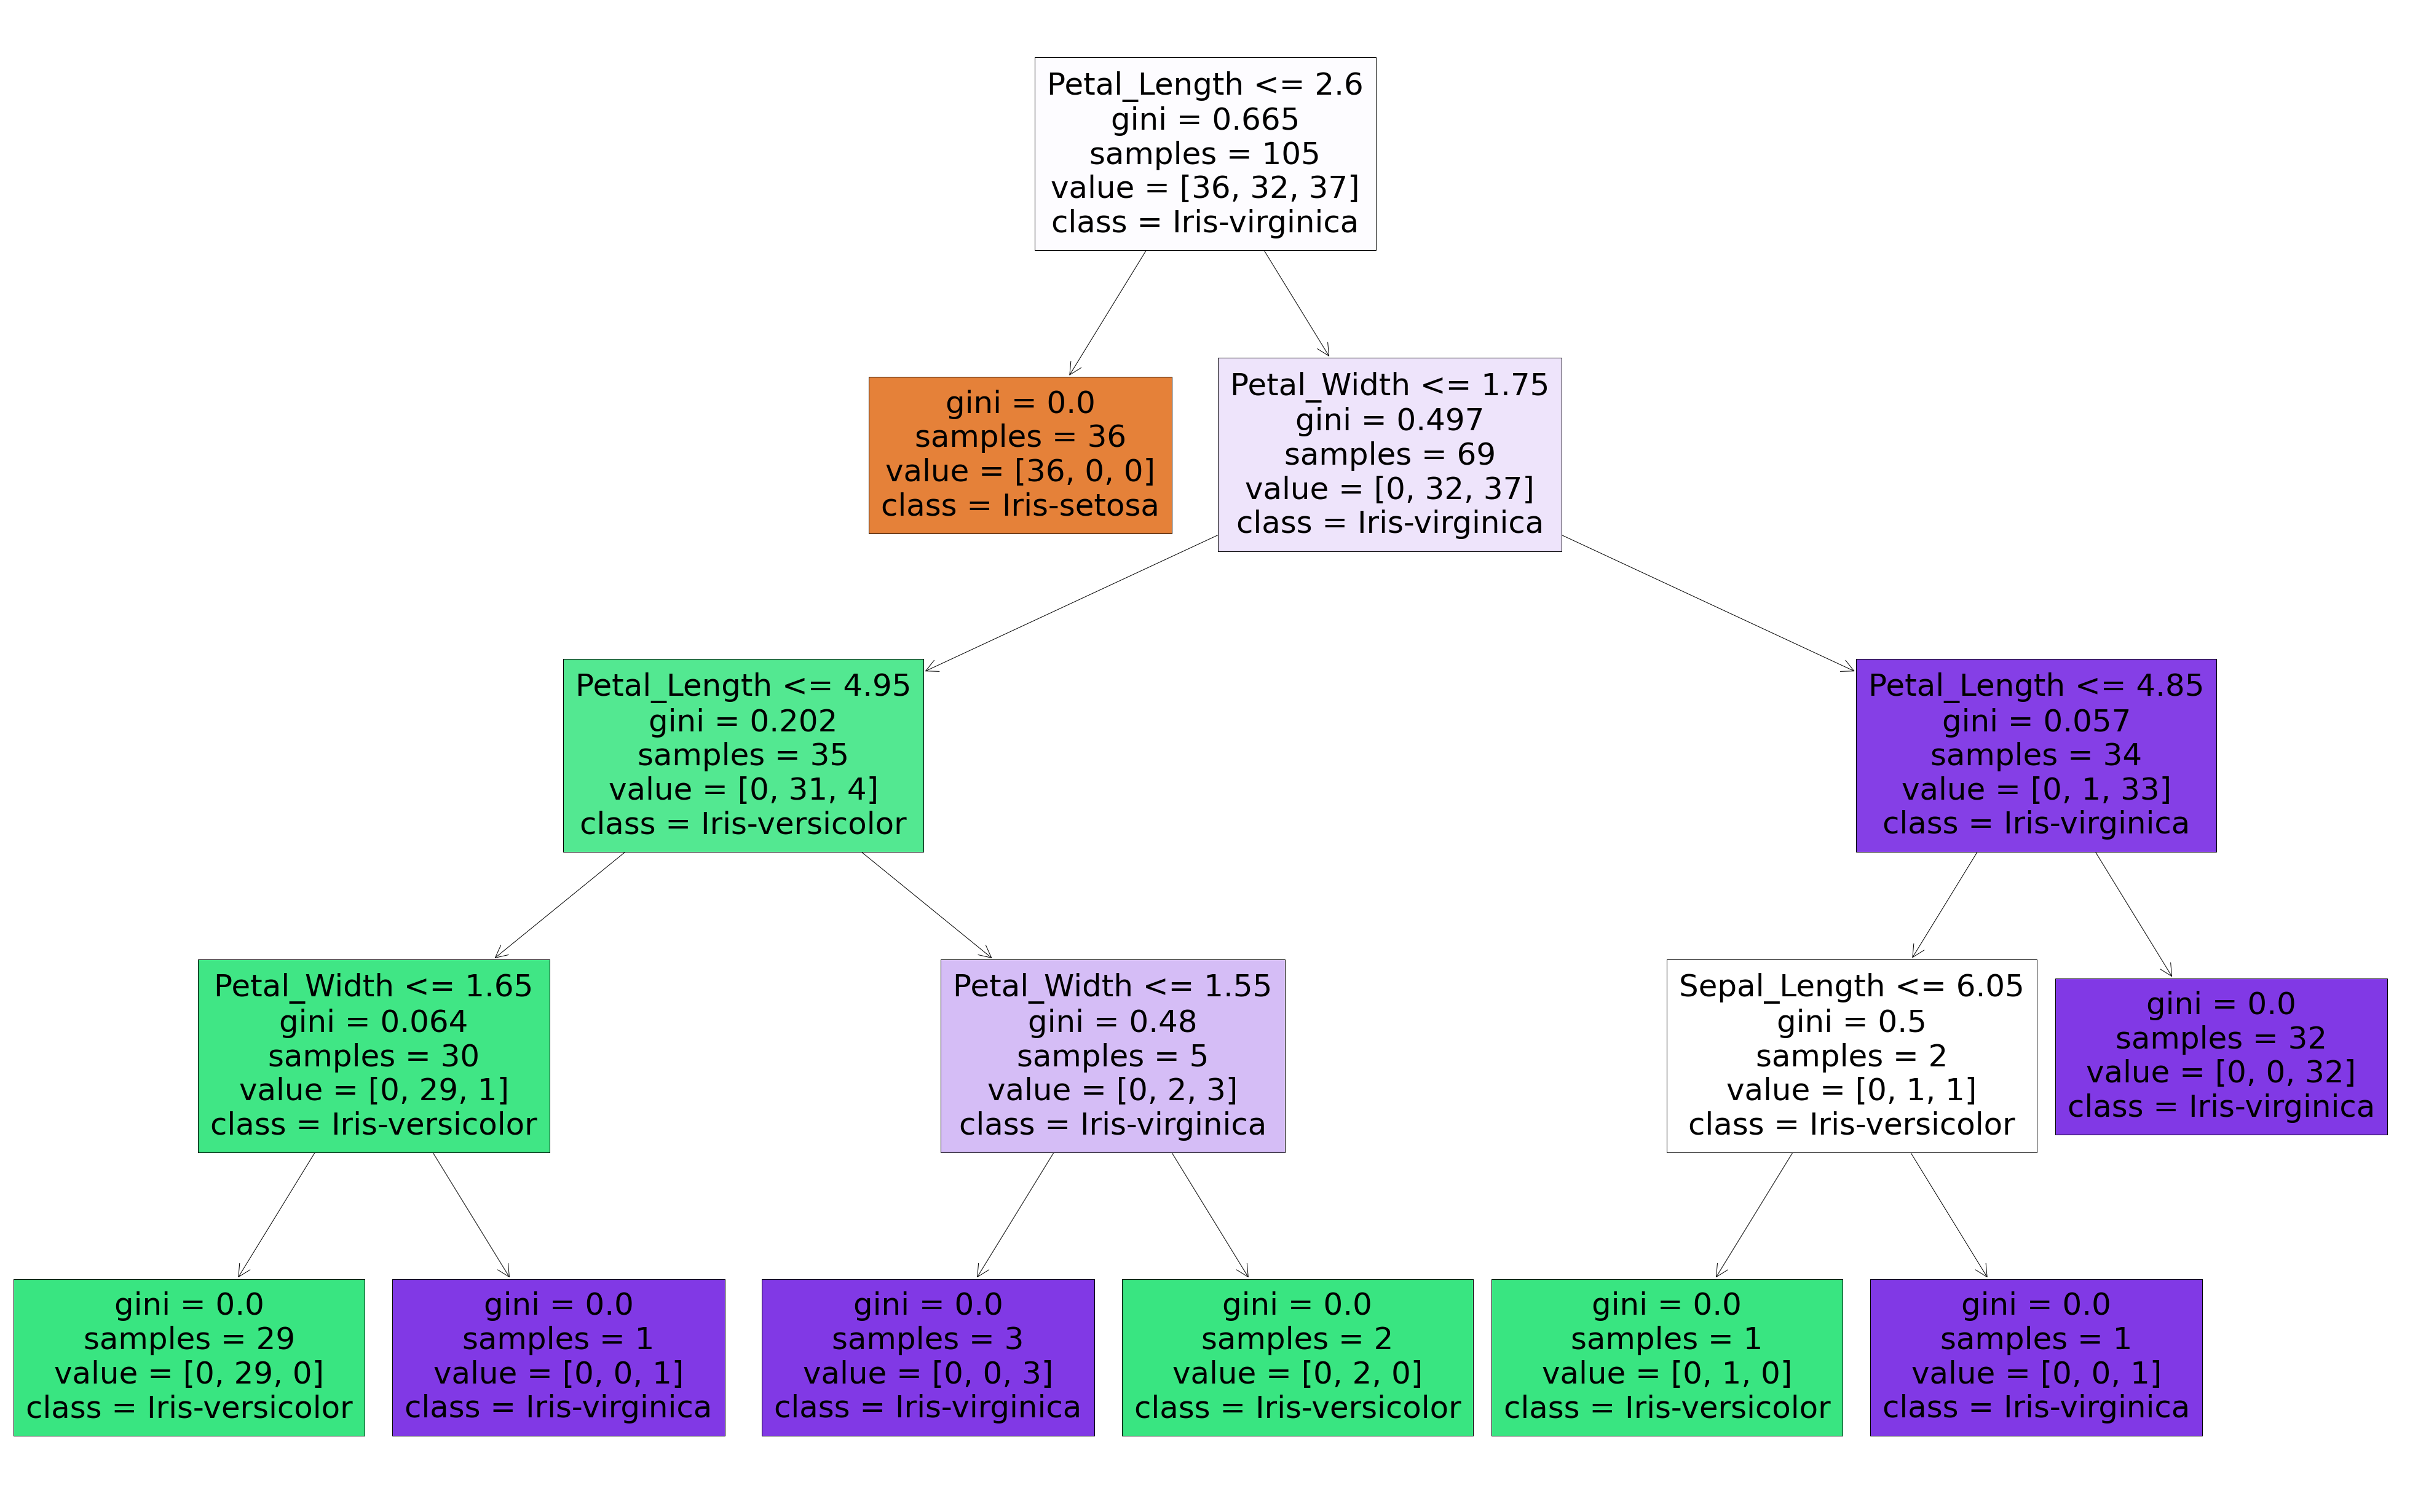

In [27]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree

feature_names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
class_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
features_names=list(df.columns[:4])

from sklearn.tree import plot_tree
plt.figure(figsize=(70,45))
plot_tree(dtree,feature_names=feature_names,class_names=class_names,filled=True)


THANK YOU